#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.*** 

## **Advanced Machine Learning Algorithms**
- **K-Nearest Neighbours (KNN)**
- **Random Forest**
- **Boosting**

Using Bank data:<br>
The data has several features related to the potential customers and whether they subscribed the  term deposit or not (outcome). The objective, in this case, is to predict which customers may respond to  their marketing campaign to open a term deposit with the bank. The response variable Y = 1 implies that  the customer subscribed a term deposit after the campaign and 0 otherwise. The marketing campaign is  based on phone calls.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [31]:
bank_df = pd.read_csv(os.getcwd()+"/Data/bank.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


#### ***Dealing with Imbalanced DataSets***

- One of the major problems in machine learning is imbalanced (or unbalanced) dataset. 
- **A dataset is  imbalanced when there is no equal representation of all classes in the data.**

In [32]:
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

**The dataset is quite imbalanced.** Both the classes are not equally represented. There are only 521 (11.5%)  observations in which customers have subscribed as opposed to 4000 (88.5%)where they have not subscribed.<br>

**In such cases, the model may not be able to learn and may be biased towards the class that is over-represented.**<br> 

Even if the model predicts that no customer will subscribe (all negatives), it will have an accuracy of more than 88%. This is called **<u>Accuracy Paradox</u>.**<br> 
But the objective of building a model here is to identify  the customers who will subscribe to the term deposit (i.e., increase the number of True Positives).<br>  

***One approach to deal with imbalanced dataset is <u>bootstrapping</u>. It involves resampling techniques such as <u>upsampling and downsampling</u>.***

   1. **<u>Upsampling</u>**: Increase the instances of under-represented minority class by replicating the existing observations in the dataset. Sampling with replacement is used for this purpose and is also called **<u>Oversampling</u>**. 
   
   2. **<u>Downsampling</u>**: Reduce the instances of over-represented majority class by removing the existing observations from the dataset and is also called **<u>Undersampling</u>**.  


<u>*sklearn.utils* has resample method to help with upsampling</u>. It takes three parameters:  
   1. The original sample set  
   2. replace: Implements resampling with replacement. If false, all resampled examples will be unique.  
   3. n_samples: Number of samples to generate.  
   

In this case, the number of examples of yes cases will be increased to 2000.

In [33]:
from sklearn.utils import resample

# seprate the cases of yes-subscribers & no-subscribers
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

# Up-sample the yes-subscribed cases
df_minority_upsampled = resample(bank_subscribed_yes, replace=True,
                                 n_samples=2000, random_state=42)

# Combine the majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [34]:
new_bank_df.subscribed.value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

After upsampling, the new_bank_df contains 4000 cases of subscribed = no and 2000 cases of subscribed =  yes in the ratio of 67:33. Before using the dataset, the examples can be shuffled to make sure they are not  in a particular order. *sklearn.utils* has a method *shuffle()*, which does the shuffling.

In [35]:
from sklearn.utils import shuffle

new_bank_df = shuffle(new_bank_df)

In [36]:
X_features = list(new_bank_df.columns)
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [37]:
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first=True)

X = encoded_bank_df

In [38]:
# The 'subscribed' column needs to be encoded as 1 - yes, 0 - no
Y = new_bank_df.subscribed.map(lambda x: int(x == 'yes'))

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
y_test.value_counts()

0    1218
1     582
Name: subscribed, dtype: int64

### ***Logistic Regression Model***

Cost function of logistic regression is called **log loss (log likelihood) or binary cross-entropy function** and is given by
$$-\frac{1}{N}\sum_{i=1}^{N}[y_iln(p_i) + (1 - y_i)ln(1 - p_i)]$$
where $p_i$ is the probability that Y belongs to class 1.
$$p_i = P(y_i = 1) = \frac{e^Z}{1 + e^Z}$$
$$Z = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_mX_m$$
where $X_1, X_2, \cdots, X_m$ are the independent variables or features.

In [41]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [42]:
pred_y = logit.predict(X_test)

In [43]:
from sklearn import metrics

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    # The matrix will be oriented as [1,0] i.e the classes with label 1 will be represented by the first row and 0 as second row
    sns.heatmap(cm, annot=True, fmt = '.2f')
                # xticklables = ["Subscribed", "Not Subscribed"], 
                # yticklables = ["Subscribed", "Not Subscribed"])
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

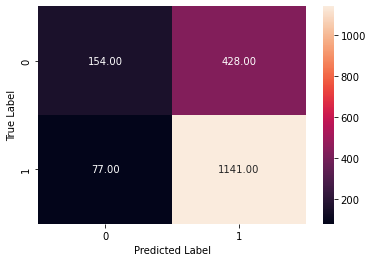

In [44]:
# Here in 1st - row represents class 1(i.e. YES) and 2nd-row represents class 0(i.e. NO)
# 1st-Column represents class 0 predicted values, 2nd-Column class 1 predicted values.

cm = draw_cm(y_test, pred_y)

In [45]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1218
           1       0.67      0.26      0.38       582

    accuracy                           0.72      1800
   macro avg       0.70      0.60      0.60      1800
weighted avg       0.71      0.72      0.68      1800



**Plotting ROC Curve**

In [46]:
predict_proba_df = pd.DataFrame(logit.predict_proba(X_test))
predict_proba_df.head()

,0,1
0,0.334785,0.665215
1,0.733292,0.266708
2,0.478457,0.521543
3,0.567237,0.432763
4,0.656898,0.343102


In [47]:
test_result_df = pd.DataFrame({'actual': y_test})
test_result_df.reset_index(inplace=True)

# Assigning the probability values for class label 1
test_result_df['chd_1'] = predict_proba_df.iloc[:, 1:2]
test_result_df.head()

,index,actual,chd_1
0,36,1,0.665215
1,3639,0,0.266708
2,1915,1,0.521543
3,3624,0,0.432763
4,4333,0,0.343102


In [48]:
auc_score = metrics.roc_auc_score(test_result_df.actual,
                                 test_result_df.chd_1)

auc_score = round(auc_score, 2)
auc_score

0.7

To visualize the ROC curve, an utility method draw_roc_curve() is implemented, which takes the  model, test set and actual labels of test set to draw the ROC curve. It returns the auc_score, false  positive rate (FPR), true positive rate (TPR) values for different threshold (cut-off probabilities)  ranging from 0.0 to 1.0.

In [49]:
## The method takes the following three parameters  
## model: the classification model  
 ## test_X: X features of the test set  
 ## test_y: actual labels of the test set  
## Returns  
  ## - ROC Auc Score   
  ## - FPR and TPRs for different threshold values 

def draw_roc_curve(model, X_test, y_test):
    # Creating and initializing a results dataframe with actual labels
    test_result_df = pd.DataFrame({'actual': y_test})
    test_result_df.reset_index(inplace=True)
    
    # predict the probabilities on test set
    predict_proba_df = pd.DataFrame(model.predict_proba(X_test))
    
    # Assigning the probability values for class label 1
    test_result_df['chd_1'] = predict_proba_df.iloc[:, 1:2]
    
    # selecting the proba. that belong to class 1
    test_result_df['chd_1'] = predict_proba_df.iloc[:, 1:2]
    
    # invoke roc_curve() to return
    fpr, tpr, thresholds = metrics.roc_curve(test_result_df.actual,
                                            test_result_df.chd_1,
                                            drop_intermediate = False)
    
    # getting roc_auc_score
    auc_score = metrics.roc_auc_score(test_result_df.actual,
                                      test_result_df.chd_1)
    
    plt.figure(figsize=(8,6))
    # plotting actual fpr & tpr values
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' %auc_score)
    # plotting the diagonal line from (0,1)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic(ROC) example")
    plt.legend(loc='lower right')
    plt.show();
    
    return auc_score, fpr, tpr, thresholds

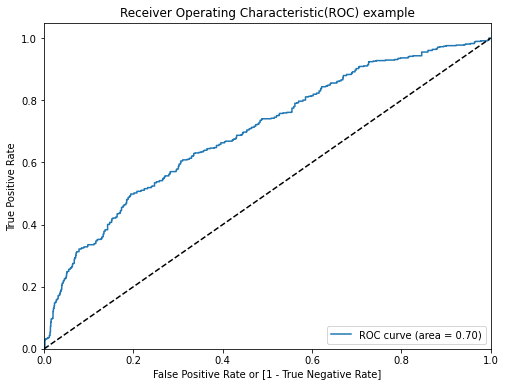

In [50]:
auc_score, fpr, tpr, thresholds = draw_roc_curve(logit, X_test, y_test)

## **K-Nearest Neighbors (KNN) Algorithm**

*<u>K-Nearest Neighbors (KNN) algorithm is a non-parametric, lazy learning algorithm used for regression and  classification problems.</u>* 

Machine learning algorithms are of two types: *<u>parametric and non-parametric</u>.*<br>

   1. **<u>Parametric models</u>** estimate a fixed number of parameters from the data and strong assumptions of the data. The data is assumed to be following a specific probability distribution. Logistic  regression is an example of a parametric model.  
   
   2. **<u>Non-parametric models</u>** do not make any assumptions on the underlying data distribution (such  as normal distribution). KNN memorizes the data and classifies new observations by comparing  the training data.
<br>

KNN algorithm finds observations in the training set, which are similar to the new observation. *These observations are called <u>neighbors</u>*. For better accuracy, a set of neighbors (K) can be considered for  classifying a new observation. The class for the new observation can be predicted to be same class that  majority of the neighbors belong to.


![KNN](KNN.png)


*sklearn.neighbors* provides *KNeighborsClassifier* algorithm for classification problems.
*KNeighborsClassifier* takes the following parameters:  
   1. n_neighbors: - int – # of neighbors. Default is k = 5.    
   2. metric: - string – The distance metrics. Default ‘Minkowski’. 
   
   3. weights: - str – Default is uniform where all points in each neighborhood are weighted equally. Else the distance which weighs points by the inverse of their distance.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier() # all default parameters
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

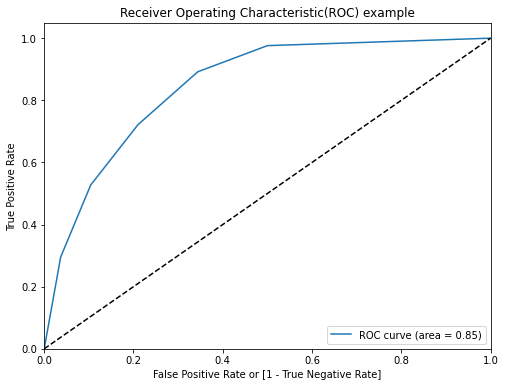

In [52]:
# KNN Accuracy
_,_,_,_ = draw_roc_curve(knn_clf, X_test, y_test)

# AUC Score of 0.85 - Better than Logistic Regg. Model

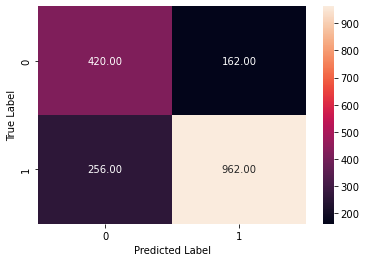

In [53]:
# Predicting on test set
pred_y = knn_clf.predict(X_test)
# Confusion MAtrix
draw_cm(y_test, pred_y)

In [54]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1218
           1       0.62      0.72      0.67       582

    accuracy                           0.77      1800
   macro avg       0.74      0.76      0.74      1800
weighted avg       0.78      0.77      0.77      1800



As shown above, the recall of positive cases has improved from 0.26(logistic regression model)  to 0.72 in the KNN model.<br> 
The above model accuracy is obtained by considering the default number of  neighbors (i.e., k = 5).<br>

***

Can the accuracy of the model be improved by increasing or reducing the number  of neighbors? In other words, what is the most optimal number of neighbors (K) to be considered for  classification in this case?<br> 

**<u>K in KNN is called hyperparameter and the process of finding optimal value for  a hyperparameter is called hyperparameter tuning.**

### ***GridSearch for Optimal Parameters***

**One of the problems in machine learning is the selection of optimal hyperparameters**.

*sklearn.model_ selection* provides a feature called *GridSearchCV*, which searches through a set of given hyperparameter values and reports the most optimal one. 

***GridSearchCV does k-fold cross-validation for each value of  hyperparameter to measure accuracy and avoid overfitting.***

GridSearchCV can be used for any machine learning algorithm to search for optimal values for its hyperparameters. GridSearchCV searches among a list of possible hyperparameter values and reports the  best value based on accuracy measures. 

GridSearchCV takes the following parameters:  
   1. estimator – scikit-learn model, which implements estimator interface. This is the ML algorithm.  
   2. param_grid – A dictionary with parameter names (string) as keys and lists of parameter values  to search for.  
   3. scoring – string – the accuracy measure. For example, ‘r2’ for regression models and ‘f1’,  ‘precision’, ‘recall’ or roc_auc’ for classification models.
   4. cv – integer – the number of folds in K-fold.  
***
In our example, the hyperparameters and corresponding set of values to search for are as follows:  
   1. n_neighbhors – All values from 5 to 10.  
   2. metric (for distance calculation) – ‘canberra’, ‘euclidean’, ‘minkowski’.  
*All possible combination of hyperparameters will be evaluated by GridSearchCV. Also, to measure the  robustness of the model, each set of value will be evaluated by K-fold cross-validation. The accuracy  measure reported will be the average accuracy across all the folds from K-fold cross-validation.*

In [55]:
from sklearn.model_selection import GridSearchCV

# Creating a dictionary with hyperparameters & possible values for searching
tuned_parameters = [{'n_neighbors': list(range(5,10)),
                     'metric': ['canberra', 'euclidean', 'minkowski']}]

# Configuring the grid search
clf = GridSearchCV(estimator = KNeighborsClassifier(),
                   param_grid = tuned_parameters,
                   cv = 10,
                   scoring = 'roc_auc')

# fit the search with training set
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': [5, 6, 7, 8, 9]}],
             scoring='roc_auc')

In [56]:
clf.best_score_

0.8353251513521043

In [57]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

In [58]:
# clf.cv_results_

GridSearch suggests that the best combination of parameters is *n_neighbors = 5* and *canberra* distance and the corresponding *roc_auc_score* is 0.835, which is slightly higher than minkowski distance.

## ***Ensemble Methods***

<img src="ensemble_methods.png" width="1000"/>

- **In above figure, K and N, respectively, are number of features and records in the original set, while k and  n, respectively, are the number of features and records in the sampled set (bootstrapped samples).** 

- The  process of bootstrapping samples from original set to build multiple models and aggregating their results  for final prediction is called **Bagging**. The term “bagging” comes from bootstrapping plus aggregating.  

- One of the most widely used bagging technique is **Random Forest**.

## **Random Forest**

Random forest is one of the most popular ensemble techniques used in the industry due to its performance  and scalability. 

- **A random forest is an ensemble of decision trees (classification and regression tree), where  each decision tree is built from bootstrap samples (sampling with replacement) and randomly selected  subset of features without replacement. The decision trees are normally grown deep (without pruning).**  

- The number of estimators or models to be used in Random Forest can be tuned to increase the  model accuracy.<br> The hyperparameters in Random Forest model are - 
   1. Number of decision trees.  
   2. Number of records and features to be sampled.  
   3. Depth and search criteria (Gini impurity index or entropy).
   

<img src="random_forest_parameters.png" width="850"/>

### ***Building a Random Forest Model***

In [67]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier()
radm_clf.fit(X_train, y_train)

RandomForestClassifier()

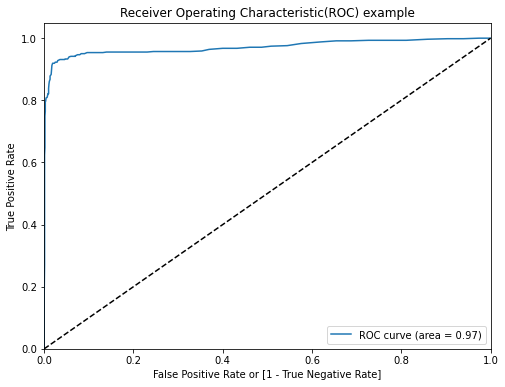

In [68]:
_,_,_,_ = draw_roc_curve(radm_clf, X_test, y_test)

# AUC in Random Forest is 0.97 which is better than KNN model

### ***Grid Search for Optimal Parameters***
Improving accuracy by using grid search by fine-tuning the hyperparameters.
<br>
One disadvantage of grid search is that it can be time-consuming. We will tune only the parameters *max_depth*,  *n_estimators* and *max_features* and use a small set of values for search.

In [69]:
from sklearn.model_selection import GridSearchCV

# Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [10, 15],
                     'n_estimators': [10, 20],
                     'max_features': ['sqrt', 0.2]}]

# Initializing the RF Classifier
radm_clf = RandomForestClassifier()

# Configuring the search with tuned parameters
clf = GridSearchCV(radm_clf,
                  tuned_parameters,
                  cv = 5,
                  scoring = 'roc_auc')

# Fitting the training set
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [70]:
clf.best_score_

0.9411057368352695

In [71]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

### ***Building the final model with Optimal Parameters***

In [73]:
radm_clf = RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=20)

radm_clf.fit(X_train, y_train)                                  

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=20)

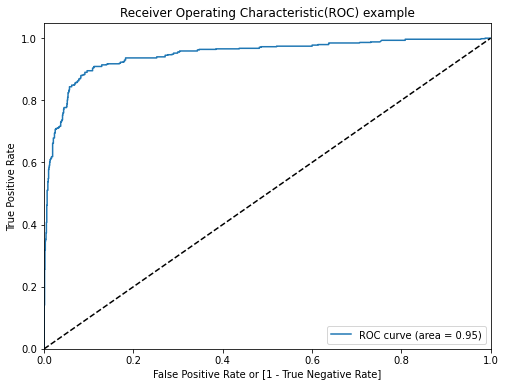

In [74]:
_,_,_,_ = draw_roc_curve(radm_clf, X_test, y_test)

# We get AUC = 0.95 which is quite good

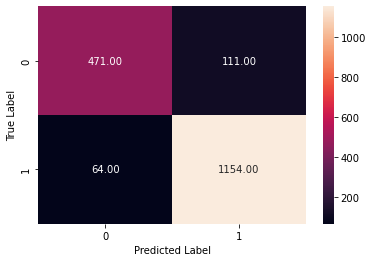

In [75]:
pred_y = radm_clf.predict(X_test)
draw_cm(y_test, pred_y)

In [76]:
y_test.value_counts()

0    1218
1     582
Name: subscribed, dtype: int64

So, our model can detect 471/582 subscribed cases and there are only 64 false positives cases.

In [78]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1218
           1       0.88      0.81      0.84       582

    accuracy                           0.90      1800
   macro avg       0.90      0.88      0.89      1800
weighted avg       0.90      0.90      0.90      1800



The precision and recall are 0.88 & 0.81 which is far better than logistic regression and KNN models.

### ***Finding Importance Features***

Random forest algorithm reports feature importance by considering feature usage over all the trees in  the forest. This gives good insight into which features have important information with respect to the  outcome variable. It uses *“Gini impurity reduction”* or *“mean decrease impurity”* for calculating the  importance.<br>

Feature importance is calculated for a feature by multiplying error reduction at any node by the  feature with the proportion of samples reaching that node. Then the values are averaged over all the trees to find final feature importance. In *sklearn*, the classifiers return a parameter called *featureimportances*, which holds the feature importance values.

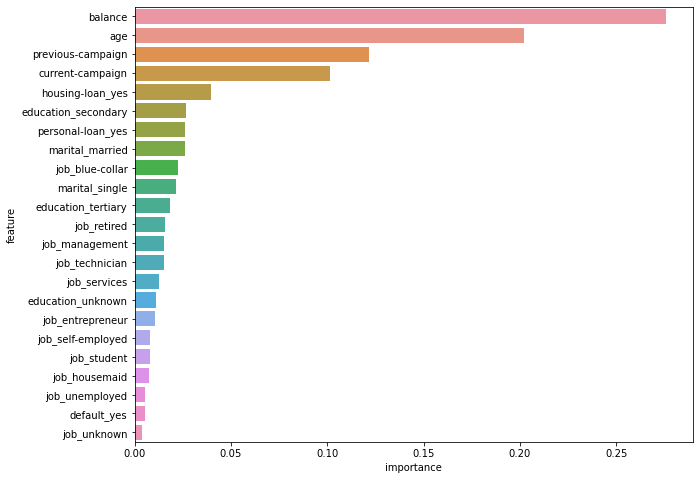

In [87]:
# Ploting imp. features in descending order of their importance

# Creating a dataframe to store the features and their importance
feature_rank = pd.DataFrame({'feature': X_train.columns, 
                             'importance': radm_clf.feature_importances_})

feature_rank.sort_values(by = 'importance', ascending=False, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(y = 'feature', x = 'importance', data = feature_rank);

In [89]:
list(feature_rank.feature[0:5])

['balance', 'age', 'previous-campaign', 'current-campaign', 'housing-loan_yes']

The top 5 features are *['balance', 'age', 'previous-campaign', 'current-campaign', 'housing-loan_yes']*<br>
The importance score is normalized and shows the relative importance of features. The cumulative  sum of features importance can show the amount of variance explained by the top five features.

In [90]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,balance,0.275725,27.572491
0,age,0.201793,47.751767
3,previous-campaign,0.121475,59.899297
2,current-campaign,0.101554,70.054696
21,housing-loan_yes,0.039418,73.996517
17,education_secondary,0.026683,76.664833
22,personal-loan_yes,0.026265,79.291293
15,marital_married,0.026002,81.891505
4,job_blue-collar,0.022344,84.125858
16,marital_single,0.021287,86.254543


The top five features provide 74% of the information in the data with respect to the outcome variable. This technique can also be used for feature selection. Random forest being a black box model, cannot be  interpreted. But it can be used to select a subset of features using feature importance criteria and build  simpler models for interpretation.

## **Boosting**

- Boosting is another popular ensemble technique which combines multiple weak classifiers into a single strong classifier.<br> A weak classifier is one which is slightly better than random guessing. That is, the error is less than 50%. 

- Any classification algorithm can be used for boosting and is called base classifier. 

- Boosting  builds multiple classifiers in a sequential manner as opposed to bagging, which can build classifiers in  parallel. Boosting builds initial classifier by giving equal weights to each sample and then focuses on  correctly classifying misclassified examples in subsequent classifiers.<br> Two most widely used boosting algorithms are -<br> **AdaBoost and Gradient Boosting.**

### ***AdaBoost Explained Clearly!***

<img src="AdaBoost.png" width="950"/>

*sklearn.ensemble.AdaBoostClassifier* takes the following parameters to build an AdaBoost model:  
   1. base_estimator: object – The base estimator from which the boosted ensemble is built. The estimator should have the capability to utilize differential weights for samples (for example, decision tree or logistic regression).  
   
   2. n_estimators: integer – The maximum number of estimators at which boosting algorithm is terminated. In the case of perfect fit, the learning procedure is stopped early. Default is 50.  
   
   3. learning_rate: float – Learning rate shrinks the contribution of each classifier specified  by learning_rate. There is a trade-off between learning_rate and n_estimators. Default value for learning_rate is 1.

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Initializing logistic regression to use as base classifier
logreg_clf = LogisticRegression()

# initializing AdaBoost classifier with 50 classifiers
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

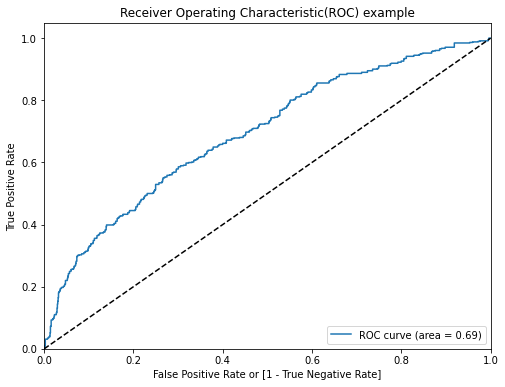

In [100]:
_,_,_,_ = draw_roc_curve(ada_clf, X_test, y_test)

## ***Gradient Boosting***

AdaBoost focusses on the misclassified examples in subsequent classifiers, whereas Gradient Boosting  focusses on residuals from previous classifiers and fits a model to the residuals. Gradient boosting algorithm repetitively leverages the patterns in residuals and strengthens the model with weak predictions  and makes it better. Once it reaches a stage in which residuals do not have any pattern that could be modeled, it stops modeling residuals. It uses gradient descent algorithm in each stage to minimize the error. ***Gradient boosting typically uses decision tree as base classifier.***

The following steps are used in gradient boosting:
   1. Fit the first model to the data $Y = F_1(x)$.
   2. Fit the next model to the residuals $\epsilon_1 = Y - F_1(x) = F_2(x)$.
   3. The above steps are repeated until the residuals do not change significantly.
   4. The final model is used to make the final predictions.
    $$F(X_i) = \left(\sum_{k=1}^{K}\alpha_kF_k(X_i)\right)$$
    where $\alpha_k$ is the learning rate or accuracy of model $k$.
    
*sklearn.ensemble.GradientBoostingClassifier* classifier takes the following key parameters:  
   1. *n_estimators*: int – The number of boosting stages to perform. Default value is 100. Gradient  boosting is fairly robust to overfitting, so usually a large number of estimators result in better  performance.  
   
   2. *max_depth*: integer – Maximum depth of the individual regression estimators. The maximum  depth limits the number of levels from the root node in the tree.  
   
   3. *max_features*: int, float, string – The number of features to consider when looking for the best  split. The applicable values are given in random forest section. 

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing Gradient Boosting with 500 estimators and max depth as 10
gboost_clf = GradientBoostingClassifier(n_estimators=500, max_depth=10)

gboost_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

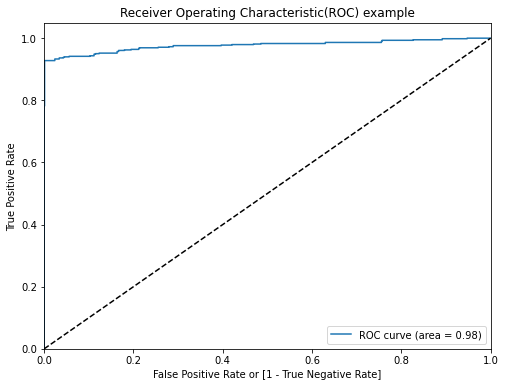

In [102]:
_,_,_,_ = draw_roc_curve(gboost_clf, X_test, y_test)

**The model has a 98% AUC score. It seems to be the best among all models we have built so far. But  is it overfitting? We will run a 10-fold cross-validation to check the model’s accuracy.**

In [104]:
from sklearn.model_selection import cross_val_score

gboost_clf = GradientBoostingClassifier(n_estimators=500, 
                                        max_depth=10)

cv_score = cross_val_score(gboost_clf, X_train, y_train,
                           cv = 10, scoring = 'roc_auc')

In [105]:
print(cv_score)

[0.94992247 0.96387809 0.96000101 0.96899382 0.97512413 0.98497821
 0.965954   0.97023508 0.94515655 0.98059581]


In [106]:
print("Mean Accuracy:", np.mean(cv_score), ", with standard deviation of:", np.std(cv_score))

Mean Accuracy: 0.9664839159892582 , with standard deviation of: 0.011893047542353688


**The model accuracy is consistent with a mean accuracy of 96.7% and a standard deviation of only 1%.  This is a robust model.**

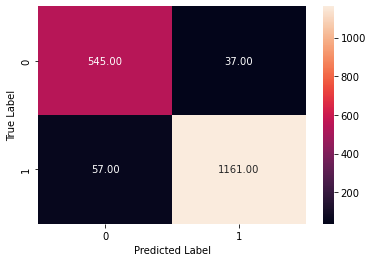

In [107]:
gboost_clf.fit(X_train, y_train)
pred_y = gboost_clf.predict(X_test)
draw_cm(y_test, pred_y)

In [108]:
y_test.value_counts()

0    1218
1     582
Name: subscribed, dtype: int64

**The Model predicts only 37 False Negatives & only 57 False Positives.**

In [109]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1218
           1       0.91      0.94      0.92       582

    accuracy                           0.95      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.95      0.95      0.95      1800



Like random forest algorithm, the boosting algorithm also provides feature importance based on  how each feature has contributed to the accuracy of the model.

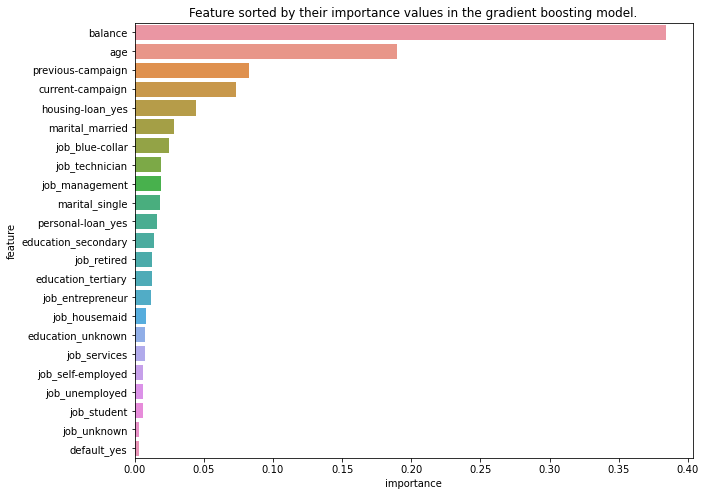

In [111]:
# Ploting imp. features in descending order of their importance

# Creating a dataframe to store the features and their importance
feature_rank = pd.DataFrame({'feature': X_train.columns, 
                             'importance': gboost_clf.feature_importances_})

feature_rank.sort_values(by = 'importance', ascending=False, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(y = 'feature', x = 'importance', data = feature_rank)
plt.title("Feature sorted by their importance values in the gradient boosting model.");

Gradient boosting also selected the features *['balance', 'age', 'previous-campaign']* as top features which have maximum information about whether a customer will subscribe or not subscribe to the term deposits.

#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.*** 